In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kabure/german-credit-data-with-risk")

print("Path to dataset files:", path)

c:\Work\GermanCreditRisk\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\M4800\.cache\kagglehub\datasets\kabure\german-credit-data-with-risk\versions\1


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd

dataset=pd.read_csv('german_credit_data.csv')

In [4]:
dataset.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


## Target ratio

In [1]:
print(dataset['Risk'].value_counts())

print(f"positive target ratio: {dataset.where(dataset['Risk'] == 'bad')[['Risk']].count()/dataset[['Risk']].count()}")

NameError: name 'dataset' is not defined

# EDA - categorical features

### restart utils

In [4]:
import importlib
import utils
importlib.reload(utils)

<module 'utils' from 'c:\\Work\\GermanCreditRisk\\utils.py'>

In [6]:
from utils import visualize_category_features

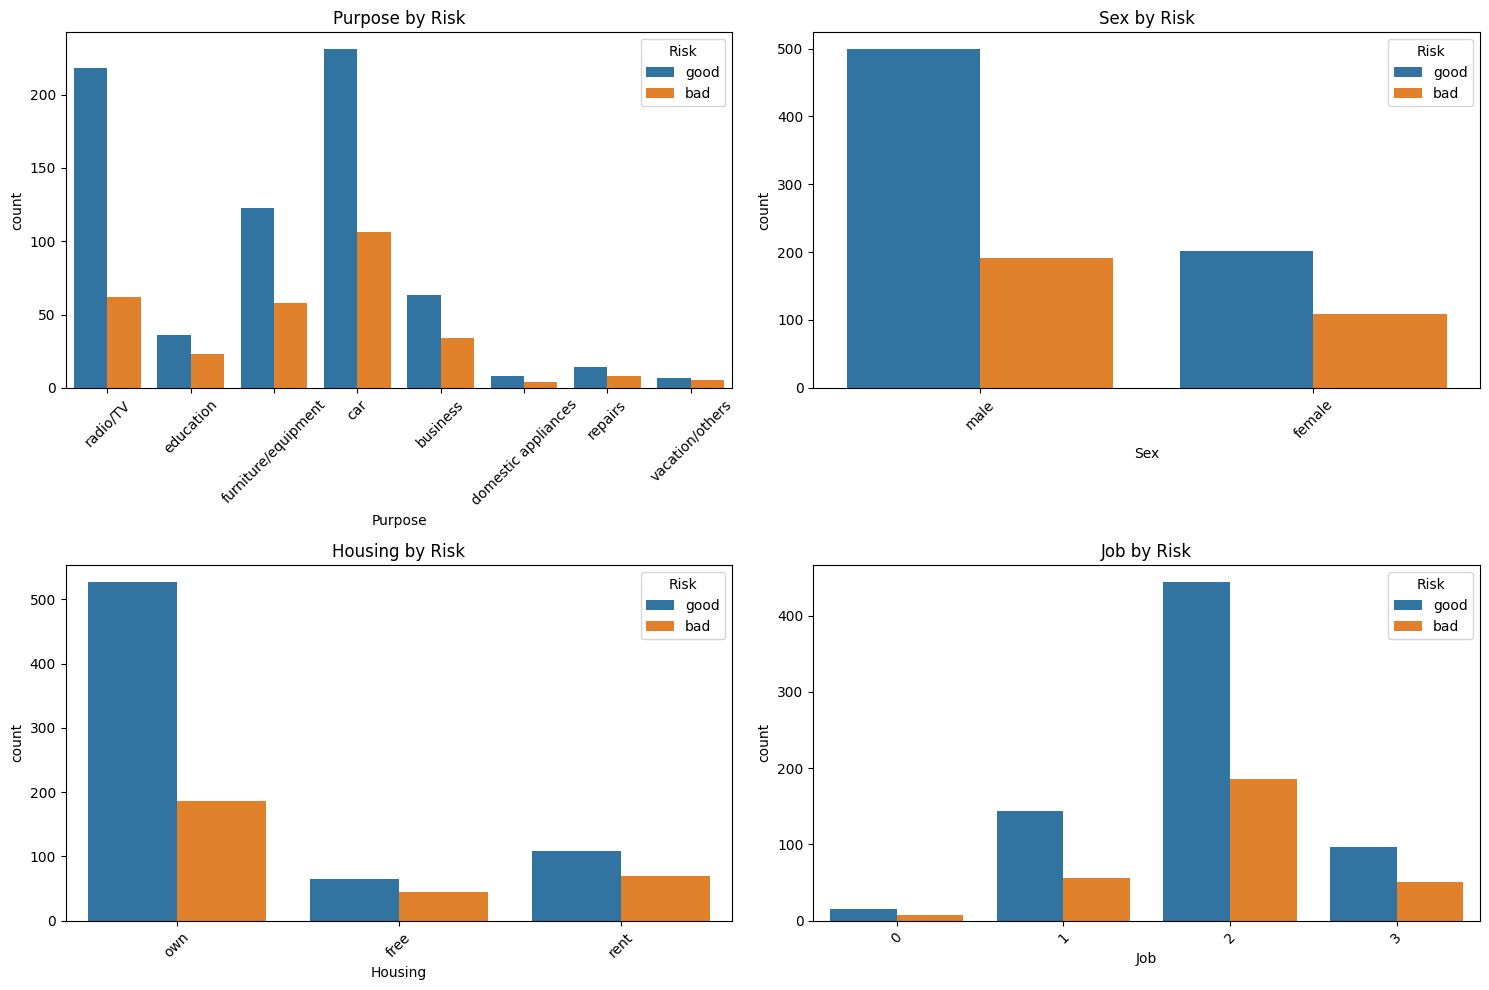

In [7]:
visualize_category_features(
    dataset=dataset,
    cat_columns=['Purpose', 'Sex', 'Housing', 'Job']
)

# EDA - Numerical features

In [2]:
from utils import visualize_numerical_features

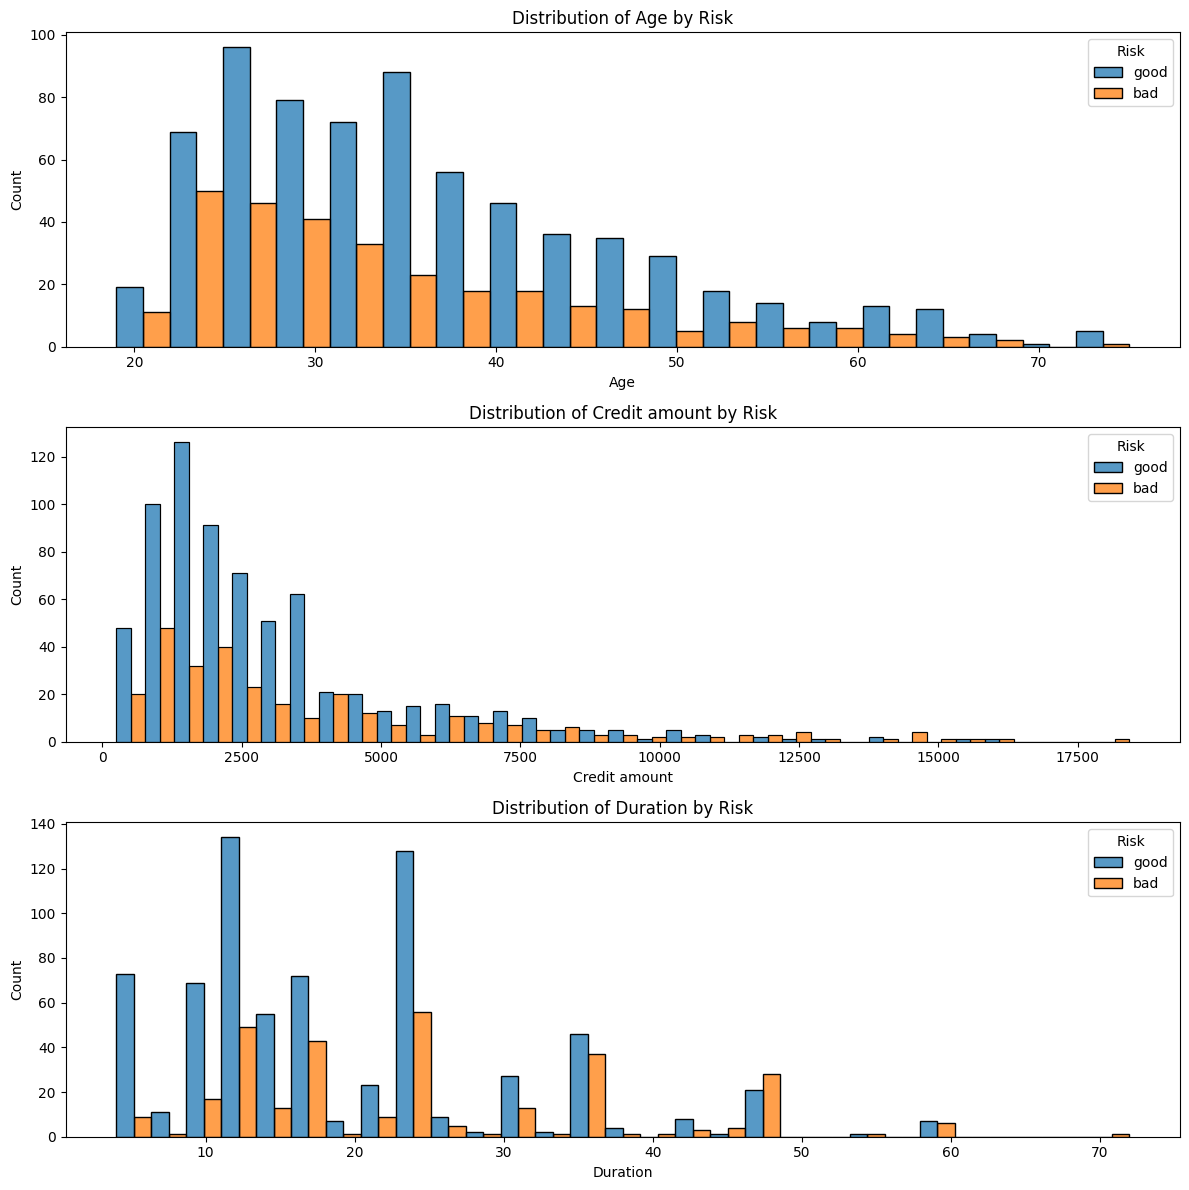

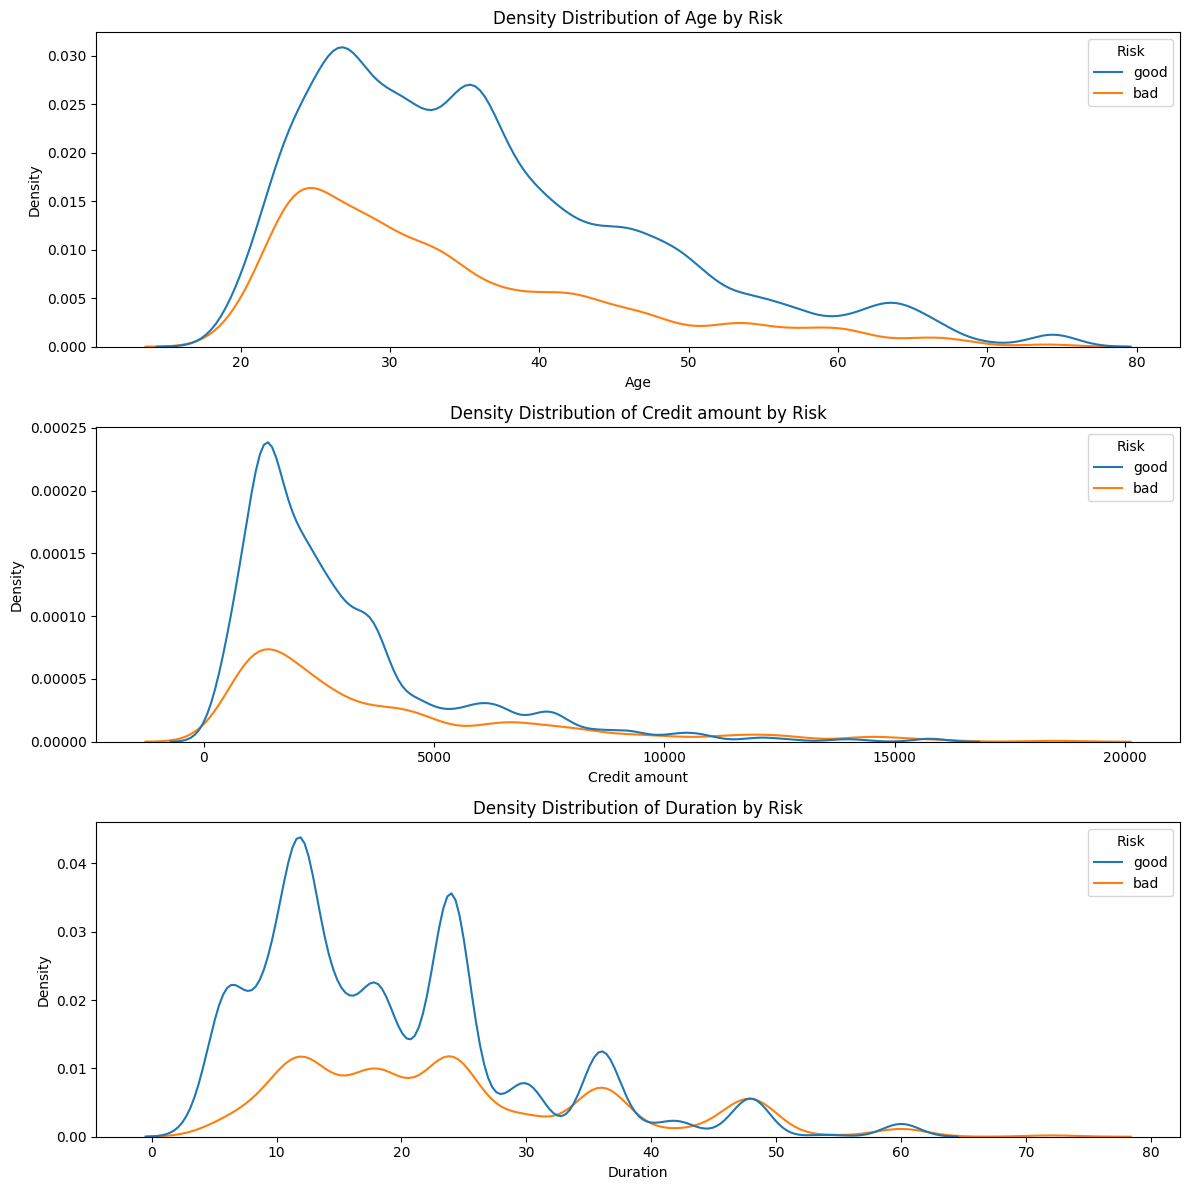

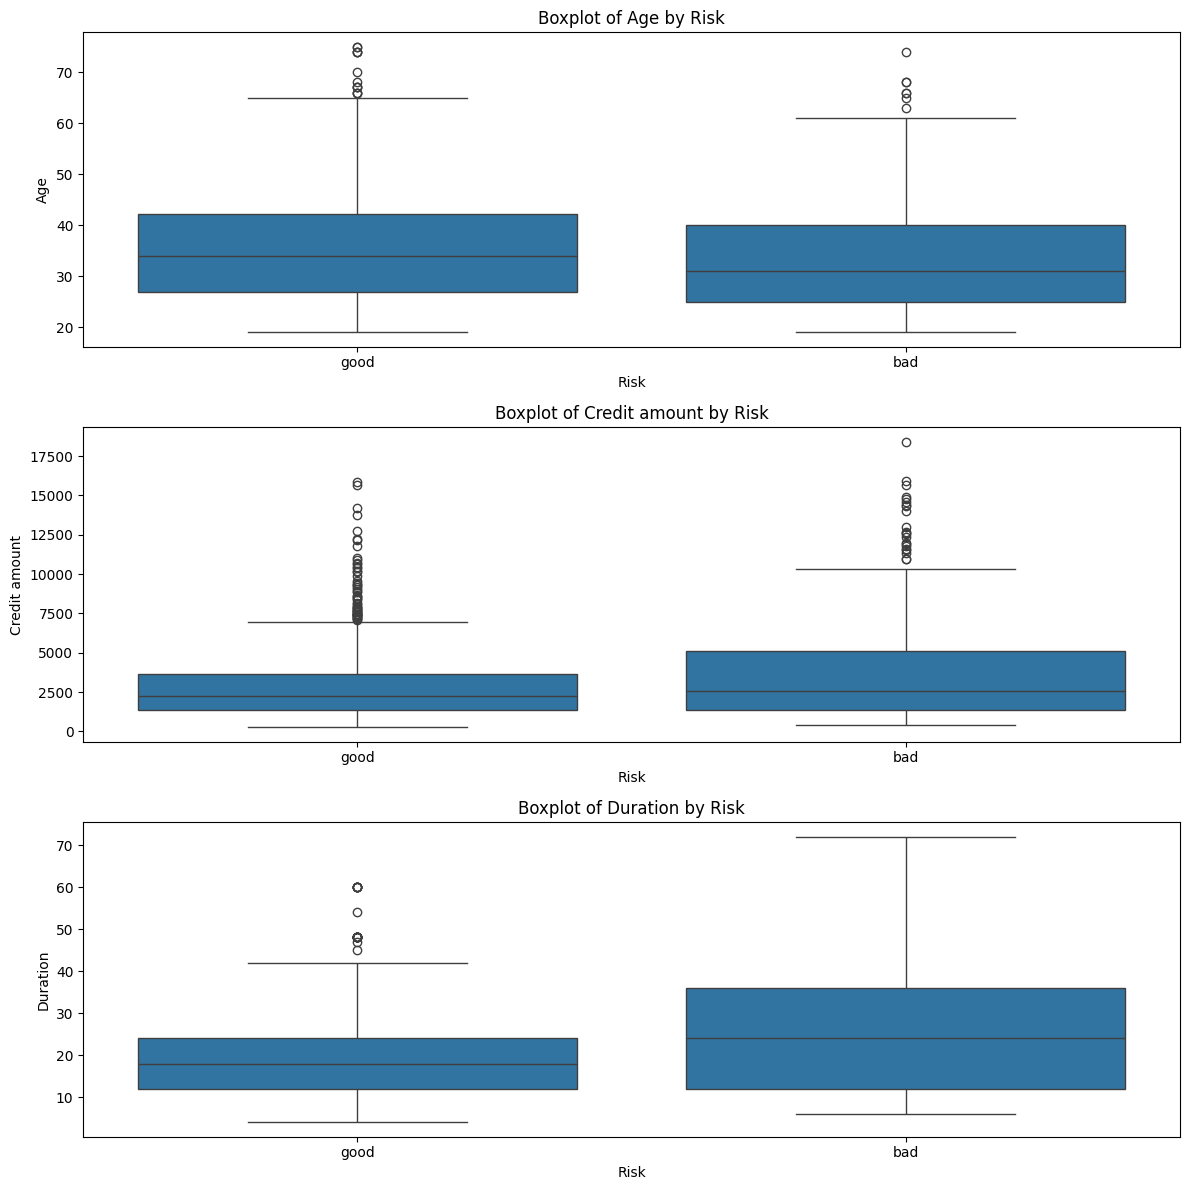

In [3]:
visualize_numerical_features(
    dataset=dataset,
    num_columns=['Age', 'Credit amount', 'Duration']
)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical columns
num_columns = ['Age', 'Credit amount', 'Duration']

# Create subplots for each numerical column
fig, axes = plt.subplots(
    len(num_columns), 
    1, 
    figsize=(12, 4*len(num_columns))
)

# Loop through each numerical column
for idx, col in enumerate(num_columns):
    # Create distribution plot using seaborn
    sns.histplot(data=dataset, x=col, hue='Risk', multiple="dodge", ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col} by Risk')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Alternative: Using KDE (Kernel Density Estimation) plots
plt.figure(figsize=(12, 4*len(num_columns)))

for idx, col in enumerate(num_columns):
    plt.subplot(len(num_columns), 1, idx+1)
    sns.kdeplot(data=dataset, x=col, hue='Risk')
    plt.title(f'Density Distribution of {col} by Risk')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Boxplots for another perspective
plt.figure(figsize=(12, 4*len(num_columns)))

for idx, col in enumerate(num_columns):
    plt.subplot(len(num_columns), 1, idx+1)
    sns.boxplot(data=dataset, x='Risk', y=col)
    plt.title(f'Boxplot of {col} by Risk')

plt.tight_layout()
plt.show()

In [ ]:
visualize_numerical_features(
    dataset=dataset,
    num_columns=[]
)

In [ ]:
dataset.